In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 19.7 MB/s eta 0:00:00


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img, load_img
import nibabel as nib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# **Dataset with Brain Atlas A**

In [48]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=200)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

### **Question 1**

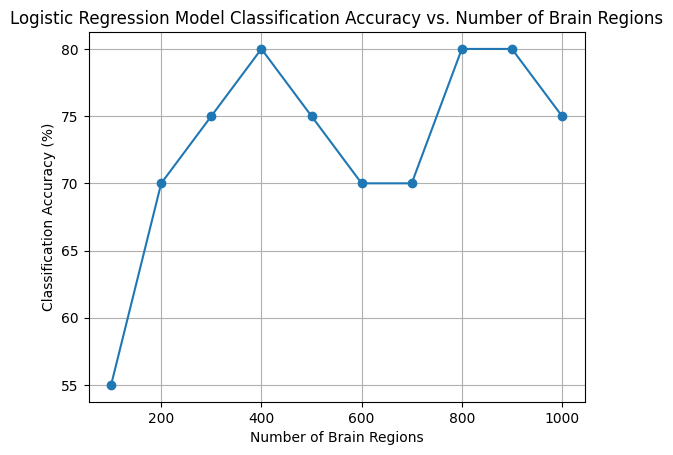

In [11]:
brain_regions=[100,200,300,400,500,600,700,800,900,1000] # List of brain regions
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
accuracies=[] # List to store accuracies

for num in brain_regions: # Iterate through brain regions
  yeo = datasets.fetch_atlas_schaefer_2018(n_rois=num)
  masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
  input_variables = masker.fit_transform(brain_data.gray_matter_maps)
  output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

  X_train=input_variables[:80] # Get first 80% of input data for training
  y_train=output_variable[:80] # Get first 80% of output data for training
  X_test=input_variables[80:] # Get last 20% of input data for testing
  y_test=output_variable[80:] # Get last 20% of output data for testing

  log_model_q1=LogisticRegression(C=1.0) # Make log regression model
  log_model_q1.fit(X_train,y_train) # Fit model on training data
  y_pred=log_model_q1.predict(X_test) # Predict on testing data

  accuracy=accuracy_score(y_pred, y_test)*100 # Get classification accuracy
  accuracies.append(accuracy) # Add accuracy to list

# Plot accuracies on test set
plt.plot(brain_regions, accuracies, marker='o')
plt.xlabel('Number of Brain Regions')
plt.ylabel('Classification Accuracy (%)')
plt.title('Logistic Regression Model Classification Accuracy vs. Number of Brain Regions')
plt.grid(True)
plt.show()

### **Question 2**

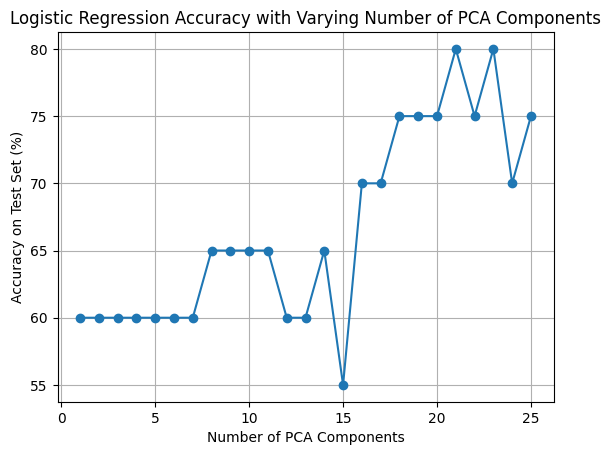

In [12]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

X_train=input_variables[:80] # Get first 80% of input data for training
y_train=output_variable[:80] # Get first 80% of output data for training
X_test=input_variables[80:] # Get last 20% of input data for testing
y_test=output_variable[80:] # Get last 20% of output data for testing

accuracies=[] # List to store accuracies

for num in range(1,26): # Iterate through the number of components to use
  PCA_model_q2=PCA(n_components=num) # Create PCA model with current num of components
  X_train_PCA=PCA_model_q2.fit_transform(X_train) # Fit model & transform training input data
  X_test_PCA = PCA_model_q2.transform(X_test) # Transform input testing data

  log_model_q2 = LogisticRegression(C=1.0) # Create log model
  log_model_q2.fit(X_train_PCA, y_train) # Fit log model on training data
  y_pred = log_model_q2.predict(X_test_PCA) # Predict on test set

  accuracy = accuracy_score(y_test, y_pred) * 100 # Calculate accuracy
  accuracies.append(accuracy) # Add accuracy to list

# Plotting accuracy results
plt.plot(range(1, 26), accuracies, marker='o')
plt.title('Logistic Regression Accuracy with Varying Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy on Test Set (%)')
plt.grid(True)
plt.show()

### **Question 3**

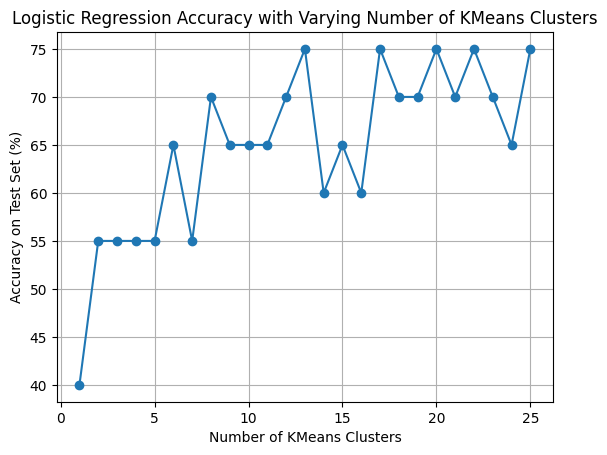

In [13]:
accuracies=[] # List to store accuracies

for num in range(1,26): # Iterate through the number of clusters
  kmeans = KMeans(n_clusters=num, random_state=42) # Create kMeans model
  X_train_kmeans = kmeans.fit_transform(X_train) # Fit & transform training input data
  X_test_kmeans = kmeans.transform(X_test) # Transform testing input data

  log_model_q3 = LogisticRegression(C=1.0) # Create log model
  log_model_q3.fit(X_train_kmeans, y_train) # Fit model on training data
  y_pred = log_model_q3.predict(X_test_kmeans) # Predict on testing data

  accuracy = accuracy_score(y_test, y_pred) * 100 # Calculate accuracy
  accuracies.append(accuracy) # Add accuracy to list

# Plotting accuracy results
plt.plot(range(1, 26), accuracies, marker='o')
plt.title('Logistic Regression Accuracy with Varying Number of KMeans Clusters')
plt.xlabel('Number of KMeans Clusters')
plt.ylabel('Accuracy on Test Set (%)')
plt.grid(True)
plt.show()

### **Question 4**

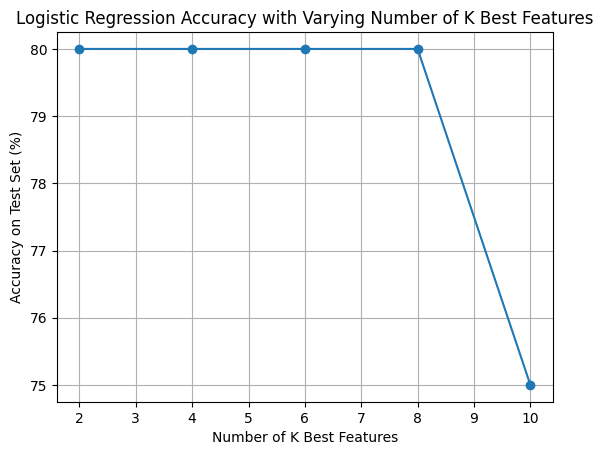

In [16]:
accuracies = [] # List to store accuracies
k_values = [2,4,6,8,10] # Values of k to test

for k in k_values: # Iterate through k values
    kbest = SelectKBest(score_func=f_classif, k=k) # Create KBest model
    X_train_kbest = kbest.fit_transform(X_train, y_train) # Fit & transform training data
    X_test_kbest = kbest.transform(X_test) # Transform testing input data

    log_model_q4 = LogisticRegression(C=1.0) # Create log model
    log_model_q4.fit(X_train_kbest, y_train) # Fit on training data
    y_pred = log_model_q4.predict(X_test_kbest) # Predict on test set

    accuracy = accuracy_score(y_test, y_pred) * 100 # Calculate accuracy
    accuracies.append(accuracy) # Add accuracy to list

# Plotting accuracy results
plt.plot(k_values, accuracies, marker='o')
plt.title('Logistic Regression Accuracy with Varying Number of K Best Features')
plt.xlabel('Number of K Best Features')
plt.ylabel('Accuracy on Test Set (%)')
plt.grid(True)
plt.show()

### **Question 5**

In [49]:
brain_regions = [100,200,300,400,500,600,700,800,900,1000]
train_proba_preds, test_proba_preds = [], [] # Lists for predictions for stacking model

for num in brain_regions: # Iterate through brain_region numbers
    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=num)
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int)

    X_train=input_variables[:80] # Get first 80% of input data for training
    y_train=output_variable[:80] # Get first 80% of output data for training
    X_test=input_variables[80:] # Get last 20% of input data for testing
    y_test=output_variable[80:] # Get last 20% of output data for testing

    log_model_q5 = LogisticRegression(C=1.0) # Create log model
    log_model_q5.fit(X_train, y_train) # Fit model on training data

    # Predict probabilities (for stacking model)
    train_proba = log_model_q5.predict_proba(X_train)[:, 1]  # Probabilities for females
    test_proba = log_model_q5.predict_proba(X_test)[:, 1]  # Probabilities for females

    train_proba_preds.append(train_proba) # Add train probs to list
    test_proba_preds.append(test_proba) # Add test probs to list

# Stack predictions for training & testing
train_proba_preds = np.column_stack(train_proba_preds)
test_proba_preds = np.column_stack(test_proba_preds)

stacking_model = LogisticRegression(C=1.0) # Create log model
stacking_model.fit(train_proba_preds, y_train) # Fit on train predictions
y_pred = stacking_model.predict(test_proba_preds) # Evaluate stacking model on test set

accuracy = accuracy_score(y_test, y_pred) # Calculate classification accuracy
print(f"Classification Accuracy: {accuracy*100:.2f}%")

Classification Accuracy: 75.00%


# **Dataset with Brain Atlas B**

In [43]:
from google.colab import drive
drive.mount('/content/drive')

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
# Alternative code to load dataset
atlas_path = '/content/drive/MyDrive/McGill/COMP 598/Challenges/Challenge 3/craddock_2011_parcellations/scorr05_mean_all.nii.gz'
atlas_img = load_img(atlas_path)
atlas_nii = index_img(atlas_img, 1) # this needs to be modified for some tasks

masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) #gives 1 for females and 0 for males

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Question 6**

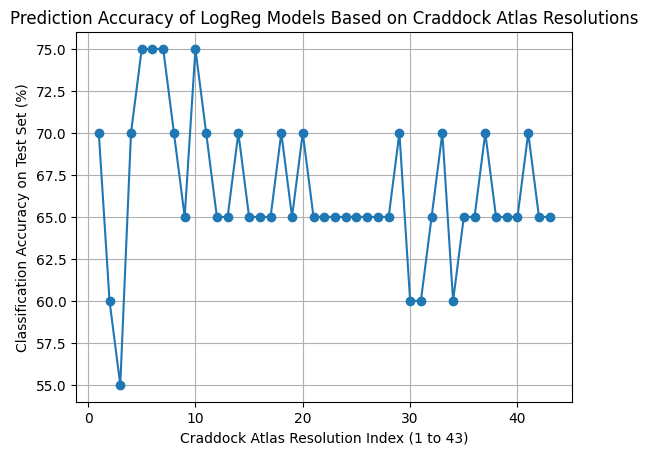

In [36]:
accuracies = [] # List to store accuracies

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
atlas_path = '/content/drive/MyDrive/McGill/COMP 598/Challenges/Challenge 3/craddock_2011_parcellations/scorr05_mean_all.nii.gz'
atlas_img = load_img(atlas_path)

for i in range(43): # Iterate through 43 Craddock region atlas resolutions
  atlas_nii = index_img(atlas_img, i) # Load atlas image for current resolution
  masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
  input_variables = masker.fit_transform(brain_data.gray_matter_maps)
  output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) #gives 1 for females and 0 for males

  X_train=input_variables[:80] # Get first 80% of input data for training
  y_train=output_variable[:80] # Get first 80% of output data for training
  X_test=input_variables[80:] # Get last 20% of input data for testing
  y_test=output_variable[80:] # Get last 20% of output data for testing

  log_model_q6 = LogisticRegression(C=1.0) # Create log model
  log_model_q6.fit(X_train, y_train) # Fit on train data
  y_pred = log_model_q6.predict(X_test) # Evaluate on test data

  accuracy = accuracy_score(y_test, y_pred)*100 # Calculate accuracy
  accuracies.append(accuracy) # Add to list

# Plot the classification accuracies
plt.plot(range(1, 44), np.array(accuracies), marker='o')
plt.xlabel('Craddock Atlas Resolution Index (1 to 43)')
plt.ylabel('Classification Accuracy on Test Set (%)')
plt.title('Prediction Accuracy of LogReg Models Based on Craddock Atlas Resolutions')
plt.grid(True)
plt.show()

### **Question 7**

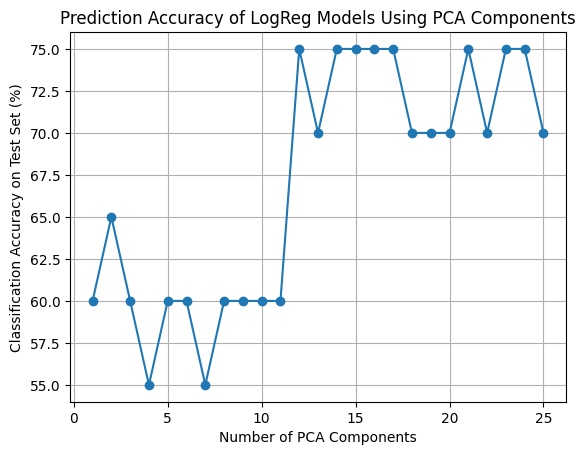

In [37]:
atlas_nii = index_img(atlas_img, 42) # We want version 43 (index 42)
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # 1=females, 0=males

X_train=input_variables[:80] # Get first 80% of input data for training
y_train=output_variable[:80] # Get first 80% of output data for training
X_test=input_variables[80:] # Get last 20% of input data for testing
y_test=output_variable[80:] # Get last 20% of output data for testing

accuracies = [] # List to store accuracies

for num in range(1, 26): # Iterate through num of PCA components
    pca_q7 = PCA(n_components=num) # Create PCA object
    X_train_pca = pca_q7.fit_transform(X_train) # Fit & transform train data
    X_test_pca = pca_q7.transform(X_test) # Transform test data

    log_model_q7 = LogisticRegression(C=1.0) # Create log model
    log_model_q7.fit(X_train_pca, y_train) # Fit on PCA training input data
    y_pred = log_model_q7.predict(X_test_pca) # Evaluate the model on the test set

    accuracy = accuracy_score(y_test, y_pred) # Get classification accuracy
    accuracies.append(accuracy) # Add accuracy to list

# Plot the classification accuracies
plt.plot(range(1, 26), np.array(accuracies) * 100, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy on Test Set (%)')
plt.title('Prediction Accuracy of LogReg Models Using PCA Components')
plt.grid(True)
plt.show()

### **Question 8**

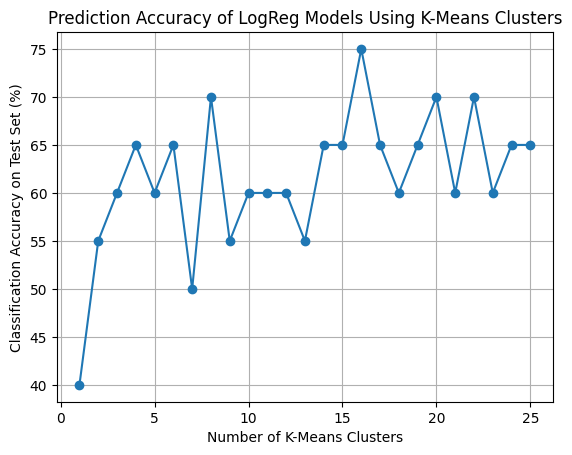

In [38]:
accuracies = [] # List to store accuracies

for n_clusters in range(1, 26): # Iterate through numbers of clusters
    kmeans_q8 = KMeans(n_clusters=n_clusters) # Create KMeans object
    X_train_kmeans = kmeans_q8.fit_transform(X_train) # Fit & transform on train input data
    X_test_kmeans = kmeans_q8.transform(X_test) # Transform testing input data

    # Fit Logistic Regression model using the cluster projections
    log_model_q8 = LogisticRegression(C=1.0) # Create log model
    log_model_q8.fit(X_train_kmeans, y_train) # Fit on train data
    y_pred = log_model_q8.predict(X_test_kmeans) # Evaluate on test set

    accuracy = accuracy_score(y_test, y_pred)*100 # Get accuracy
    accuracies.append(accuracy) # Add accuracy to list

# Plot the classification accuracies
plt.plot(range(1, 26), np.array(accuracies), marker='o')
plt.xlabel('Number of K-Means Clusters')
plt.ylabel('Classification Accuracy on Test Set (%)')
plt.title('Prediction Accuracy of LogReg Models Using K-Means Clusters')
plt.grid(True)
plt.show()

### **Question 9**

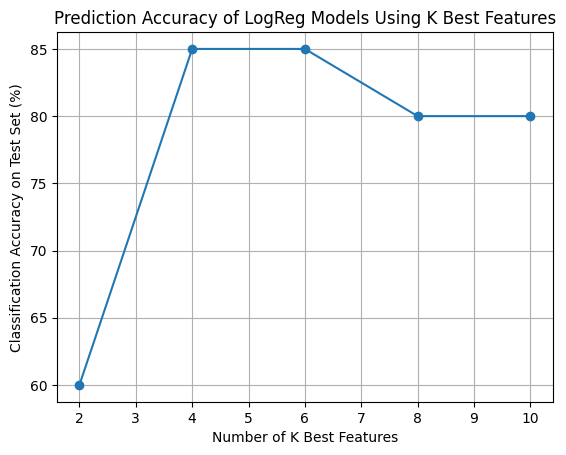

In [39]:
accuracies = [] # List to store accuracies
k_values = [2, 4, 6, 8, 10] # List of k values

for k in k_values: # Iterate through k values
    kbest_q9 = SelectKBest(score_func=f_classif, k=k) # Create KBest object
    X_train_kbest = kbest_q9.fit_transform(X_train, y_train) # Fit & transform training data
    X_test_kbest = kbest_q9.transform(X_test) # Transform testing data

    log_model_q9 = LogisticRegression(C=1.0) # Create log model
    log_model_q9.fit(X_train_kbest, y_train) # Fit on training data
    y_pred = log_model_q9.predict(X_test_kbest) # Evaluate on the test data

    accuracy = accuracy_score(y_test, y_pred)*100 # Get accuracy
    accuracies.append(accuracy) # Add accuracy to list

# Plot the classification accuracies
plt.plot(k_values, np.array(accuracies), marker='o')
plt.xlabel('Number of K Best Features')
plt.ylabel('Classification Accuracy on Test Set (%)')
plt.title('Prediction Accuracy of LogReg Models Using K Best Features')
plt.grid(True)
plt.show()

### **Question 10**

In [51]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
atlas_path = '/content/drive/MyDrive/McGill/COMP 598/Challenges/Challenge 3/craddock_2011_parcellations/scorr05_mean_all.nii.gz'
atlas_img = load_img(atlas_path)

train_proba_preds, test_proba_preds = [], [] # Lists for predictions for stacking model

#for i in range(43): # Iterate through 43 Craddock region atlas resolutions
for i in range(43):
    atlas_nii = index_img(atlas_img, i) # Load atlas image for current resolution
    masker = NiftiLabelsMasker(labels_img=atlas_nii, standardize=True)
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) #gives 1 for females and 0 for males

    X_train=input_variables[:80] # Get first 80% of input data for training
    y_train=output_variable[:80] # Get first 80% of output data for training
    X_test=input_variables[80:] # Get last 20% of input data for testing
    y_test=output_variable[80:] # Get last 20% of output data for testing

    log_model_q10 = LogisticRegression(C=1.0) # Create log model
    log_model_q10.fit(X_train, y_train) # Fit model on training data

    # Predict probabilities (for stacking model)
    train_proba = log_model_q10.predict_proba(X_train)[:,1]  # Probs for females
    test_proba = log_model_q10.predict_proba(X_test)[:,1]  # Probs for females

    train_proba_preds.append(train_proba) # Add train probs to list
    test_proba_preds.append(test_proba) # Add test probs to list

# Stack predictions for training & testing
train_proba_preds = np.column_stack(train_proba_preds)
test_proba_preds = np.column_stack(test_proba_preds)

stacking_model = LogisticRegression(C=1.0) # Create log model
stacking_model.fit(train_proba_preds, y_train) # Fit on train predictions
y_pred = stacking_model.predict(test_proba_preds) # Evaluate stacking model on test set

accuracy = accuracy_score(y_test, y_pred) # Calculate classification accuracy
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

Classification Accuracy: 65.00%
